# F20DL Coursework Group 8 2023-24

### Group 8 Members:
- Madihah Anaum
- Tanisha Kasar
- Sneha Sunny
- Dhruv Raghu
- Moses Varghese

# Part 3. Supervised Learning: Generalisation & Overfitting; Decision Trees

## Content
- Coursework Title

In [1]:
# import basic libaries
import numpy as np
import pandas as pd

# import libraries for classification and other studies
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the chosen data set
chosen_data = pd.read_csv("datasets/data/Crime_Data_from_2020_to_Present.csv")

In [5]:
# check for duplicated values
print(chosen_data.duplicated().sum())
# check for missing values
print(chosen_data.isnull().sum())
# check the total number of missing values
chosen_data.isnull().sum().sum()

0
DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           112762
Vict Age               0
Vict Sex          107192
Vict Descent      107200
Premis Cd              9
Premis Desc          480
Weapon Used Cd    531448
Weapon Desc       531448
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          755765
Crm Cd 3          813869
Crm Cd 4          815823
LOCATION               0
Cross Street      685361
LAT                    0
LON                    0
dtype: int64


4461367

In [4]:
# fill the missing values with the mode (most frequent) value
chosen_data_cleaned = chosen_data.fillna(chosen_data.mode().iloc[0])
# check for missing values
chosen_data_cleaned.isnull().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64

In [5]:
# create a new data set with only numerics from the chosen data set by using label encoding
chosen_data_num = chosen_data_cleaned.copy()

chosen_data_num = chosen_data_num.select_dtypes(include=['number'])

In [6]:
# create the features and target data sets
features = chosen_data_num.drop(columns=["Crm Cd"])
target = chosen_data_num["Crm Cd"]

In [7]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(571117, 11)
(571117,)
(244765, 11)
(244765,)


In [18]:
print(X_train.isnull().sum().sum())
print(y_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())
print(y_test.isnull().sum().sum())

0
0
0
0


## Decision Trees using only Train Dataset

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, train_size=0.3, random_state=42)

# Create Decision Tree classifer object
dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt.fit(X_train1,y_train1)

#Predict the response for test dataset
y_pred_dt = dt.predict(X_test1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(571117, 14)
(571117,)
(244765, 14)
(244765,)


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# create a custom function for getting metrics for each class
def class_metrics(y_test, y_pred, algorithm='<Alg Name>'):
    conf_matrix = confusion_matrix(y_test, y_pred)

    num_classes = len(conf_matrix)

    # create a table of comparison comapring the accuracy, precision, true positive rate, false positive rate and f1 score for each class and then the entire model
    metrics = pd.DataFrame(columns=['Precision', 'Recall', 'FP Rate', 'F1 Score'])

    tp_sum = 0
    fn_sum = 0
    fp_sum = 0
    tn_sum = 0

    for i in range(num_classes):
        # Calculate metrics for the current class
        tp = conf_matrix[i, i]
        fn = conf_matrix[i, :].sum() - tp
        fp = conf_matrix[:, i].sum() - tp
        tn = conf_matrix.sum() - (tp + fn + fp)

        tp_sum += tp
        fn_sum += fn
        fp_sum += fp
        tn_sum += tn

        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        fp_rate = fp/(fp+tn)
        f_measure = 2*precision*recall/(precision+recall)

        metrics.loc[i] = [precision, recall, fp_rate, f_measure]
        
    metrics.index = ['Class '+str(i) for i in range(num_classes)]

    return metrics

In [10]:
# function to get overall metrics
def overall_metrics(y_test, y_pred, algorithm='<Alg Name>'):
    conf_matrix = confusion_matrix(y_test, y_pred)

    num_classes = len(conf_matrix)
    
    tp_sum = 0
    fn_sum = 0
    fp_sum = 0
    tn_sum = 0

    metrics = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'FP Rate', 'F1 Score'])

    for i in range(num_classes):
        # Calculate metrics for the current class
        tp = conf_matrix[i, i]
        fn = conf_matrix[i, :].sum() - tp
        fp = conf_matrix[:, i].sum() - tp
        tn = conf_matrix.sum() - (tp + fn + fp)

        tp_sum += tp
        fn_sum += fn
        fp_sum += fp
        tn_sum += tn

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    fp_rate = fp_sum/(fp_sum+tn_sum)
    f_measure = f1_score(y_test, y_pred, average='macro')

    metrics.loc[0] = [accuracy, precision, recall, fp_rate, f_measure]
    metrics.index = [algorithm]

    return metrics

In [11]:
print('Class Metrics')
print(class_metrics(y_test1, y_pred_dt, 'Decision Tree'))
print('\nOverall Metrics')
print(overall_metrics(y_test1, y_pred_dt, 'Decision Tree'))

Class Metrics
           Precision    Recall   FP Rate  F1 Score
Class 0     1.000000  1.000000  0.000000  1.000000
Class 1     1.000000  1.000000  0.000000  1.000000
Class 2     1.000000  1.000000  0.000000  1.000000
Class 3     1.000000  1.000000  0.000000  1.000000
Class 4     0.999927  1.000000  0.000003  0.999963
...              ...       ...       ...       ...
Class 131   1.000000  1.000000  0.000000  1.000000
Class 132   1.000000  0.925000  0.000000  0.961039
Class 133   0.984733  0.992308  0.000005  0.988506
Class 134   1.000000  1.000000  0.000000  1.000000
Class 135   1.000000  1.000000  0.000000  1.000000

[136 rows x 4 columns]

Overall Metrics
               Accuracy  Precision    Recall   FP Rate  F1 Score
Decision Tree  0.999272   0.924099  0.919332  0.000005  0.915582


## Decision Trees Using 10-Fold Cross-Validation

Now you will start working with the provided test data sets.
 Use Decision trees (the J48 algorithm) on the training set, measure the accuracy. Then measure
the accuracy on the training set using 10-fold cross-validation. Record all your findings and explain
them. Use the major metrics: accuracy, TP rate, FP rate, precision, recall, F measure, the ROC area if
needed.

In [27]:
# retrain the model using 10 fold cross validation and then test the results
from sklearn.model_selection import cross_val_predict, cross_val_score

# using cross_val predict
y_pred_dt_cv = cross_val_predict(dt, X_train, y_train, cv=10)

print('Class Metrics for Cross Val Predict')
print(class_metrics(y_train, y_pred_dt_cv, 'Cross Val'))
print('\nOverall Metrics for Cross Val Predict')
print(overall_metrics(y_train, y_pred_dt_cv, 'Cross Val'))

Class Metrics for Cross Val Predict
           Precision    Recall   FP Rate  F1 Score
Class 0     1.000000  1.000000  0.000000  1.000000
Class 1     1.000000  1.000000  0.000000  1.000000
Class 2     1.000000  1.000000  0.000000  1.000000
Class 3     1.000000  1.000000  0.000000  1.000000
Class 4     0.999847  0.999898  0.000005  0.999872
...              ...       ...       ...       ...
Class 132   1.000000  1.000000  0.000000  1.000000
Class 133   0.944444  0.980769  0.000005  0.962264
Class 134   0.994737  0.994737  0.000002  0.994737
Class 135   1.000000  1.000000  0.000000  1.000000
Class 136   1.000000  1.000000  0.000000  1.000000

[137 rows x 4 columns]

Overall Metrics for Cross Val Predict
           Accuracy  Precision    Recall   FP Rate  F1 Score
Cross Val  0.999725   0.984383  0.982216  0.000002  0.981557


In [28]:
# using cross val scores
scores = cross_val_score(dt, X_train, y_train, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.99964981 0.99966732 0.9996323  0.99970234 0.99970234 0.99966732
 0.99977238 0.99994747 0.99956226 0.99973735]
Accuracy: 1.00 (+/- 0.00)


## Decision Trees Using Train and Test Data Sets

Repeat the experiment, this time using training and testing data sets instead of the cross
validation. That is, build the J48 classifier using the training data set, and test the classifier using the test
data set. Note the accuracy. Answer the question: Does the decision tree generalize well to new data?
How do you tell?


In [29]:
# Train Decision Tree Classifer
dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt_tt = dt.predict(X_test)

print('Class Metrics for Train Test Split')
print(class_metrics(y_test, y_pred_dt_tt, 'Decision Tree Train Test'))
print('\nOverall Metrics for Train Test Split')
print(overall_metrics(y_test, y_pred_dt_tt, 'Decision Tree Train Test'))

Class Metrics for Train Test Split
           Precision    Recall   FP Rate  F1 Score
Class 0     1.000000  1.000000  0.000000  1.000000
Class 1     1.000000  1.000000  0.000000  1.000000
Class 2     1.000000  1.000000  0.000000  1.000000
Class 3     1.000000  1.000000  0.000000  1.000000
Class 4     0.999763  0.999644  0.000008  0.999703
...              ...       ...       ...       ...
Class 131   1.000000  1.000000  0.000000  1.000000
Class 132   0.866667  1.000000  0.000008  0.928571
Class 133   0.989583  0.979381  0.000004  0.984456
Class 134   1.000000  1.000000  0.000000  1.000000
Class 135   1.000000  1.000000  0.000000  1.000000

[136 rows x 4 columns]

Overall Metrics for Train Test Split
                          Accuracy  Precision    Recall   FP Rate  F1 Score
Decision Tree Train Test  0.999681   0.984363  0.986172  0.000002  0.983285


## Decision Tree Parameters and Their Influence

Experiment with various decision tree parameters that control the size of the tree. For example:
depth of the tree, confidence threshold for pruning, splitting criteria and the minimal number of instances
permissible per leaf. Make conclusions about their influence on the classifier's performance.

#### Max Depth Test

Overall Metrics for Max Depth 1
             Accuracy  Precision    Recall   FP Rate  F1 Score
Max Depth 1  0.170392   0.002531  0.014705  0.006145  0.004273


Overall Metrics for Max Depth 5
             Accuracy  Precision    Recall   FP Rate  F1 Score
Max Depth 5  0.706478   0.133839  0.146872  0.002174  0.130415


Overall Metrics for Max Depth 10
              Accuracy  Precision    Recall   FP Rate  F1 Score
Max Depth 10  0.951223   0.528278  0.504336  0.000361  0.495579


Overall Metrics for Max Depth 15
              Accuracy  Precision    Recall   FP Rate  F1 Score
Max Depth 15  0.992262   0.789932  0.780234  0.000057  0.772028


Overall Metrics for Max Depth 20
              Accuracy  Precision    Recall   FP Rate  F1 Score
Max Depth 20  0.999048   0.942909  0.939296  0.000007  0.936125


Overall Metrics for Max Depth 25
              Accuracy  Precision    Recall   FP Rate  F1 Score
Max Depth 25  0.999661   0.983464  0.985087  0.000003  0.982301


Overall Metrics for Max Dept

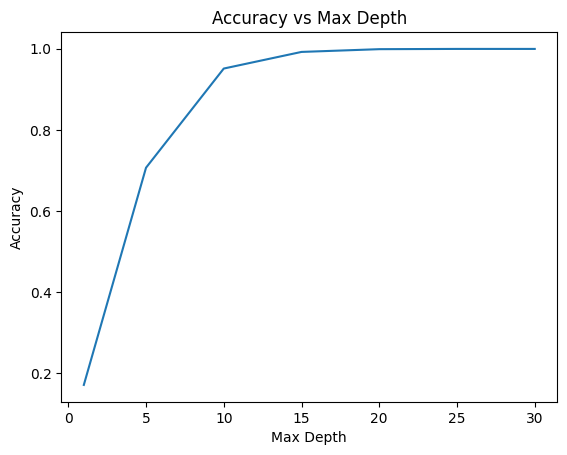

In [30]:
test_parameters = [1, 5, 10, 15, 20, 25, 30]
accuracies = []

for i in test_parameters:
    # Create Decision Tree classifer object
    dt = DecisionTreeClassifier(max_depth=i, random_state=42)

    # Train Decision Tree Classifer
    dt.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = dt.predict(X_test)

    accuracies.append([i, accuracy_score(y_test, y_pred)])

    print('Overall Metrics for Max Depth '+str(i))
    print(overall_metrics(y_test, y_pred, 'Max Depth '+str(i)))
    print('\n')

# plot accuracy vs max_depth
plt.plot(test_parameters, [x[1] for x in accuracies])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.show()

#### Confidence Threshold Test

Overall Metrics for Min Samples Split 2
                     Accuracy  Precision    Recall   FP Rate  F1 Score
Min Samples Split 2  0.999661   0.983464  0.985087  0.000003  0.982301
Overall Metrics for Min Samples Split 4
                     Accuracy  Precision  Recall   FP Rate  F1 Score
Min Samples Split 4  0.999669   0.984972   0.989  0.000002   0.98614
Overall Metrics for Min Samples Split 6
                     Accuracy  Precision    Recall   FP Rate  F1 Score
Min Samples Split 6  0.999681   0.985377  0.987616  0.000002   0.98503
Overall Metrics for Min Samples Split 8
                     Accuracy  Precision    Recall   FP Rate  F1 Score
Min Samples Split 8  0.999665    0.97982  0.981741  0.000002  0.980336
Overall Metrics for Min Samples Split 10
                      Accuracy  Precision    Recall   FP Rate  F1 Score
Min Samples Split 10  0.999645   0.948202  0.952624  0.000003  0.949723
Overall Metrics for Min Samples Split 12
                      Accuracy  Precision    Recal

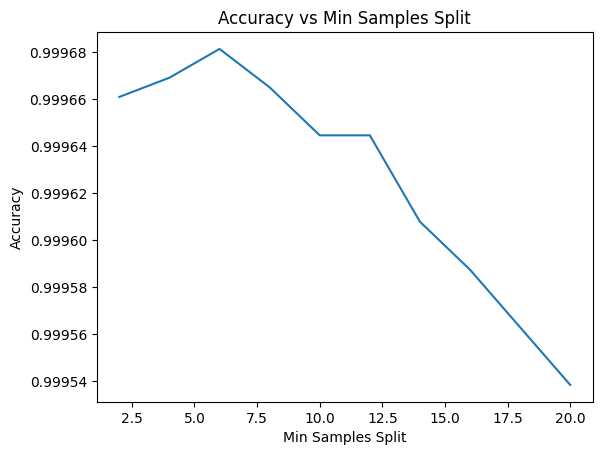

In [31]:
test_parameters = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
accuracies = []

for i in test_parameters:
    # Create Decision Tree classifer object
    dt = DecisionTreeClassifier(min_samples_split=i, random_state=42)

    # Train Decision Tree Classifer
    dt.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = dt.predict(X_test)

    accuracies.append([i, accuracy_score(y_test, y_pred)])

    print('Overall Metrics for Min Samples Split '+str(i))
    print(overall_metrics(y_test, y_pred, 'Min Samples Split '+str(i)))

# plot accuracy vs min_samples_split
plt.plot(test_parameters, [x[1] for x in accuracies])
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Min Samples Split')
plt.show()

#### Splitting Criteria Test

In [32]:
# splitting criteria parameters to test
parameters = ['gini', 'entropy']

accuracies = []

for i in parameters:
    # Create Decision Tree classifer object
    dt = DecisionTreeClassifier(criterion=i, random_state=42)

    # Train Decision Tree Classifer
    dt.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = dt.predict(X_test)

    accuracies.append([i, accuracy_score(y_test, y_pred)])

    print('Overall Metrics for Criterion '+str(i))
    print(overall_metrics(y_test, y_pred, 'Criterion '+str(i)))

Overall Metrics for Criterion gini
                Accuracy  Precision    Recall   FP Rate  F1 Score
Criterion gini  0.999661   0.983464  0.985087  0.000003  0.982301
Overall Metrics for Criterion entropy
                   Accuracy  Precision    Recall   FP Rate  F1 Score
Criterion entropy   0.99971   0.984876  0.989957  0.000002  0.986057


#### Minimim Number of Instances per Leaf Test

Overall Metrics for Min Samples per Leaf 2
                        Accuracy  Precision    Recall   FP Rate  F1 Score
Min Samples per Leaf 2  0.999653   0.973563  0.980204  0.000003  0.974783
Overall Metrics for Min Samples per Leaf 4
                        Accuracy  Precision  Recall   FP Rate  F1 Score
Min Samples per Leaf 4  0.999604   0.937327  0.9425  0.000003  0.939209
Overall Metrics for Min Samples per Leaf 6
                        Accuracy  Precision    Recall   FP Rate  F1 Score
Min Samples per Leaf 6  0.999448   0.874113  0.885771  0.000004  0.878773
Overall Metrics for Min Samples per Leaf 8
                        Accuracy  Precision    Recall   FP Rate  F1 Score
Min Samples per Leaf 8  0.999318   0.852288  0.857623  0.000005  0.852515
Overall Metrics for Min Samples per Leaf 10
                         Accuracy  Precision    Recall   FP Rate  F1 Score
Min Samples per Leaf 10  0.999289   0.822101  0.834293  0.000005  0.825508
Overall Metrics for Min Samples per Leaf 12
  

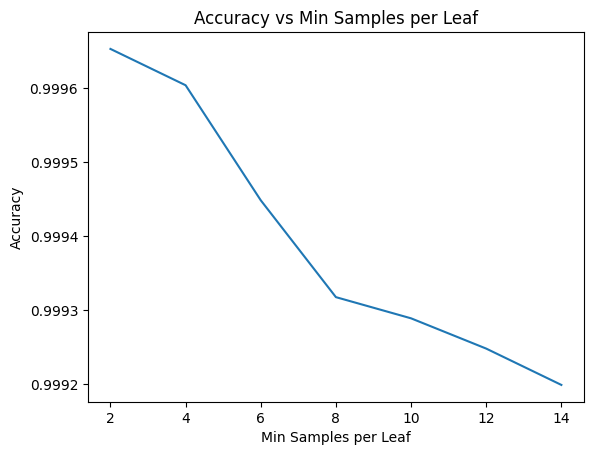

In [33]:
parameters = [2, 4, 6, 8, 10, 12, 14]
accuracies = []

for i in parameters:
    # Create Decision Tree classifer object
    dt = DecisionTreeClassifier(min_samples_leaf=i, random_state=42)

    # Train Decision Tree Classifer
    dt.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = dt.predict(X_test)

    accuracies.append([i, accuracy_score(y_test, y_pred)])

    print('Overall Metrics for Min Samples per Leaf '+str(i))
    print(overall_metrics(y_test, y_pred, 'Min Samples per Leaf '+str(i)))

# plot accuracy vs min_impurity_decrease
plt.plot(parameters, [x[1] for x in accuracies])
plt.xlabel('Min Samples per Leaf')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Min Samples per Leaf')
plt.show()

In [34]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=18, criterion='entropy', min_samples_leaf=6, random_state=42)
dt.fit(X_train,y_train)
y_pred_par = dt.predict(X_test)

print('Class Metrics for Parameter Tuned Tree')
print(class_metrics(y_test, y_pred_par, 'Paramenter Tuned Tree'))
print('\nOverall Metrics for Parameter Tuned Tree')
print(overall_metrics(y_test, y_pred_par, 'Parameter Tuned Tree'))

Class Metrics for Parameter Tuned Tree
           Precision  Recall   FP Rate  F1 Score
Class 0     0.992974     1.0  0.000012  0.996475
Class 1          NaN     0.0  0.000000       NaN
Class 2     1.000000     1.0  0.000000  1.000000
Class 3     1.000000     1.0  0.000000  1.000000
Class 4     0.999526     1.0  0.000017  0.999763
...              ...     ...       ...       ...
Class 131   0.966667     1.0  0.000004  0.983051
Class 132   1.000000     1.0  0.000000  1.000000
Class 133   0.989796     1.0  0.000004  0.994872
Class 134   1.000000     1.0  0.000000  1.000000
Class 135   1.000000     1.0  0.000000  1.000000

[136 rows x 4 columns]

Overall Metrics for Parameter Tuned Tree
                      Accuracy  Precision    Recall   FP Rate  F1 Score
Parameter Tuned Tree  0.998321   0.781671  0.811133  0.000012  0.791674


## Test Set 30% Boost

Make new training and testing sets, by moving 30% of the instances from the original training
set into the testing set. Note the accuracies on the training and the testing sets

In [35]:
# remove 30% of instance from X_train and y_train
from sklearn.model_selection import train_test_split

print('X_train: ', X_train.shape)
print('X_test:', X_test.shape)

X_train_new, X_test_add, y_train_new, y_test_add = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

X_test_30 = X_test
y_test_30 = y_test.values
# Add X_test_add and y_test_add to X_test and y_test
X_test_new = np.concatenate((X_test_30, X_test_add), axis=0)
y_test_new = np.concatenate((y_test_30, y_test_add), axis=0)

print('New X_train:', X_train_new.shape)
print('New X_test:', X_test_new.shape)

dt.fit(X_train_new,y_train_new)
y_pred_30 = dt.predict(X_test_new)

print(class_metrics(y_test_new, y_pred_30, '30% Boost'))
print(overall_metrics(y_test_new, y_pred_30, '30% Boost'))

X_train:  (571117, 11)
X_test: (244765, 11)
New X_train: (399781, 11)
New X_test: (416101, 11)
           Precision    Recall   FP Rate  F1 Score
Class 0     0.995896  1.000000  0.000007  0.997944
Class 1          NaN  0.000000  0.000000       NaN
Class 2     1.000000  1.000000  0.000000  1.000000
Class 3     1.000000  1.000000  0.000000  1.000000
Class 4     0.999721  1.000000  0.000010  0.999861
...              ...       ...       ...       ...
Class 133   0.956522  1.000000  0.000005  0.977778
Class 134   1.000000  0.969697  0.000000  0.984615
Class 135   1.000000  0.953947  0.000000  0.976431
Class 136   1.000000  1.000000  0.000000  1.000000
Class 137   1.000000  1.000000  0.000000  1.000000

[138 rows x 4 columns]
           Accuracy  Precision    Recall   FP Rate  F1 Score
30% Boost  0.998231   0.768733  0.798797  0.000013  0.778521


## Test Set 60% Boost

Make new training and testing sets, by moving 60% of the instances from the original training
set into the testing set. Note the accuracies on the training and the testing sets

In [36]:
# remove 60% of instance from X_train and y_train
from sklearn.model_selection import train_test_split

print('X_train: ', X_train.shape)
print('X_test:', X_test.shape)

X_train_new, X_test_add, y_train_new, y_test_add = train_test_split(X_train, y_train, test_size=0.6, random_state=42)

X_test_60 = X_test
y_test_60 = y_test.values
# Add X_test_add and y_test_add to X_test and y_test
X_test_new = np.concatenate((X_test_60, X_test_add), axis=0)
y_test_new = np.concatenate((y_test_60, y_test_add), axis=0)

print('New X_train:', X_train_new.shape)
print('New X_test:', X_test_new.shape)

dt.fit(X_train_new,y_train_new)
y_pred_60 = dt.predict(X_test_new)

print(class_metrics(y_test_new, y_pred_60, '60% Boost'))
print(overall_metrics(y_test_new, y_pred_60, '60% Boost'))

X_train:  (571117, 11)
X_test: (244765, 11)
New X_train: (228446, 11)
New X_test: (587436, 11)
           Precision  Recall   FP Rate  F1 Score
Class 0     0.994100    1.00  0.000010  0.997041
Class 1          NaN    0.00  0.000000       NaN
Class 2     1.000000    1.00  0.000000  1.000000
Class 3     1.000000    1.00  0.000000  1.000000
Class 4     0.999702    1.00  0.000011  0.999851
...              ...     ...       ...       ...
Class 133   0.967213    1.00  0.000003  0.983333
Class 134   1.000000    0.98  0.000000  0.989899
Class 135   0.945205    1.00  0.000020  0.971831
Class 136   1.000000    1.00  0.000000  1.000000
Class 137   1.000000    1.00  0.000000  1.000000

[138 rows x 4 columns]
           Accuracy  Precision    Recall  FP Rate  F1 Score
60% Boost  0.997196   0.696981  0.734269  0.00002  0.708833


## Test Set 90% Boost

In [37]:
# remove 90% of instance from X_train and y_train
from sklearn.model_selection import train_test_split

print('X_train: ', X_train.shape)
print('X_test:', X_test.shape)

X_train_new, X_test_add, y_train_new, y_test_add = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

X_test_90 = X_test
y_test_90 = y_test.values
# Add X_test_add and y_test_add to X_test and y_test
X_test_new = np.concatenate((X_test_90, X_test_add), axis=0)
y_test_new = np.concatenate((y_test_90, y_test_add), axis=0)

print('New X_train:', X_train_new.shape)
print('New X_test:', X_test_new.shape)

dt.fit(X_train_new,y_train_new)
y_pred_90 = dt.predict(X_test_new)

print(class_metrics(y_test_new, y_pred_90, '90% Boost'))
print(overall_metrics(y_test_new, y_pred_90, '90% Boost'))

X_train:  (571117, 11)
X_test: (244765, 11)
New X_train: (57111, 11)
New X_test: (758771, 11)
           Precision    Recall   FP Rate  F1 Score
Class 0     0.994652  1.000000  0.000009  0.997319
Class 1          NaN  0.000000  0.000000       NaN
Class 2     1.000000  1.000000  0.000000  1.000000
Class 3     1.000000  1.000000  0.000000  1.000000
Class 4     0.999769  1.000000  0.000008  0.999885
...              ...       ...       ...       ...
Class 133   0.554795  1.000000  0.000086  0.713656
Class 134        NaN  0.000000  0.000000       NaN
Class 135   0.964602  0.825758  0.000011  0.889796
Class 136   0.419355  0.764706  0.000047  0.541667
Class 137   1.000000  1.000000  0.000000  1.000000

[138 rows x 4 columns]
           Accuracy  Precision    Recall   FP Rate  F1 Score
90% Boost  0.996475   0.644946  0.679393  0.000026  0.655837


## Discussion on Test Boost Sets and Overfitting

Analyse your results from the point of view of the problem of classifier over-fitting. Do you
notice the effects of over-fitting? How? Note your conclusions in the Jupyter notebook.

## Additional Tree Classifier Studies

For higher marks, try some other decision tree algorithms (e.g. random forests). Repeat all of the
above experiments and make conclusions.

Decision Tree

In [17]:
# Fit the classifier to the training data
dt.fit(X_train, y_train)
# Make predictions on the test data
y_pred_dt = dt.predict(X_test)
overall_metrics(y_test, y_pred_dt, 'Decision Tree')

,Accuracy,Precision,Recall,FP Rate,F1 Score
Decision Tree,0.999628,0.981406,0.987908,0.000003,0.982582


Extra Tree

In [18]:
from sklearn.tree import ExtraTreeClassifier
# Create an ExtraTreeClassifier instance
extra_tree_classifier = ExtraTreeClassifier()
# Fit the classifier to the training data
extra_tree_classifier.fit(X_train, y_train)
# Make predictions on the test data
y_pred_extra_tree = extra_tree_classifier.predict(X_test)
overall_metrics(y_test, y_pred_extra_tree, 'Extra Tree')

,Accuracy,Precision,Recall,FP Rate,F1 Score
Extra Tree,0.846984,0.480728,0.462567,0.001125,0.469527


Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
# Create a RandomForestClassifier instance
rf_classifier = RandomForestClassifier()
# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)
# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)
overall_metrics(y_test, y_pred_rf, 'Random Forest')

,Accuracy,Precision,Recall,FP Rate,F1 Score
Random Forest,0.979732,0.670073,0.544122,0.00015,0.570641


Ada Boost

In [22]:
from sklearn.ensemble import AdaBoostClassifier
# Create an AdaBoostClassifier instance
adaboost_classifier = AdaBoostClassifier()
# Fit the classifier to the training data
adaboost_classifier.fit(X_train, y_train)
# Make predictions on the test data
y_pred_adaboost = adaboost_classifier.predict(X_test)
overall_metrics(y_test, y_pred_adaboost, 'AdaBoost')

,Accuracy,Precision,Recall,FP Rate,F1 Score
AdaBoost,0.181905,0.02457,0.036764,0.00606,0.026318


Bagging Classifier

In [13]:
from sklearn.ensemble import BaggingClassifier
# Create a BaggingClassifier instance with DecisionTreeClassifier as base estimator
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier())
# Fit the classifier to the training data
bagging_classifier.fit(X_train, y_train)
# Make predictions on the test data
y_pred_bagging = bagging_classifier.predict(X_test)
overall_metrics(y_test, y_pred_bagging, 'Bagging')

,Accuracy,Precision,Recall,FP Rate,F1 Score
Bagging,0.999665,0.969799,0.971039,0.000002,0.968966


In [23]:
# table of comparison
metrics = [overall_metrics(y_test, y_pred_dt, 'Decision Tree'), overall_metrics(y_test, y_pred_extra_tree, 'Extra Tree'), overall_metrics(y_test, y_pred_rf, 'Random Forest'), overall_metrics(y_test, y_pred_adaboost, 'AdaBoost'), overall_metrics(y_test, y_pred_bagging, 'Bagging')]
metrics = pd.concat(metrics)
metrics

,Accuracy,Precision,Recall,FP Rate,F1 Score
Decision Tree,0.999628,0.981406,0.987908,0.000003,0.982582
Extra Tree,0.846984,0.480728,0.462567,0.001125,0.469527
Random Forest,0.979732,0.670073,0.544122,0.000150,0.570641
AdaBoost,0.181905,0.024570,0.036764,0.006060,0.026318
Bagging,0.999665,0.969799,0.971039,0.000002,0.968966


Gradient Boosting (takes too long to run)

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# # Create a GradientBoostingClassifier instance
# gb_classifier = GradientBoostingClassifier()
# # Fit the classifier to the training data
# gb_classifier.fit(X_train, y_train)
# # Make predictions on the test data
# y_pred_gb = gb_classifier.predict(X_test)

Hist Gradient Boosting (also takes too long to run)

In [ ]:
# from sklearn.experimental import enable_hist_gradient_boosting
# from sklearn.ensemble import HistGradientBoostingClassifier

# # Create a HistGradientBoostingClassifier instance
# hist_gb_classifier = HistGradientBoostingClassifier()

# # Fit the classifier to the training data
# hist_gb_classifier.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred_hist_gb = hist_gb_classifier.predict(X_test)